<div style="text-align: right"> 13.12.2019</div>

***Name: Daniel Leube*** 

# Hausaufgabe Blatt 8

## Rollen: Schiefe Ebene 

Wir betrachten einen Zylinder mit Radius $R$, Masse $m$ und Kreismittelpunkt $M$. Wir wollen die Bewegung des Zylinders entlang einer schiefen Ebene berechnen und visualisieren. Die schiefe Ebene hat einen Neigungswinkel $\theta = 12^{\circ}$. Der Startpunkt des Zylinders befinde sich $h_0=1$ über dem Boden.


<img src="./rollingPlane.png" alt="rollingPlane" width="300"/>

Die Höhe $h$ nach der auf der Ebene zurückgelegten Strecke $l$ beträgt
$$
h = h_0 - l \sin \theta
$$

und somit gilt für die potentielle Energie:
$$
E_{\mathrm{pot}} = m g (h_0 - l \sin \theta).
$$

Die kinetische Energie setzt sich zusammen aus der Translationsenergie $E_\mathrm{trans}=\frac{1}{2}mv^2 = \frac{1}{2}m\omega^2 R^2$ und der Rotationsenergie um die Hauptrotationsachse $E_\mathrm{rot}=\frac{1}{2}I\omega^2$, wobei $I$ das Trägheitsmoment des Zylinders bezüglich seiner Hauptrotationsachse ist
$$
E_\mathrm{kin}= E_\mathrm{trans} + E_\mathrm{rot} = \frac{1}{2}\left(I+mR^2\right)\omega^2.
$$

Die potentielle Energie wird beim Rollen in kinetische Energie umgesetzt. Es gilt also nach zurückgelegter Strecke $l$
$$
 m g l \sin \theta = \frac{1}{2}\left(I+mR^2\right)\omega^2.
 $$
 
**a)** Nehmen Sie an, es handle sich um einen Vollzylinder mit der Masse $m=1$ und einem Radius $R=0.1$.
Plotten Sie die Geschwindigkeit $v$ des Mittelpunktes $M$ in Abhängigkeit von der zurückgelegten Strecke $l$.

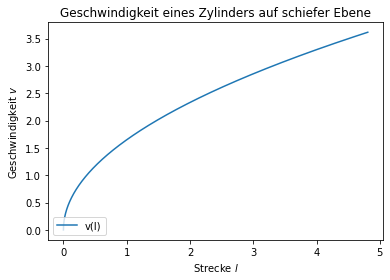

In [17]:
import numpy as np
import matplotlib.pyplot as plt
m =  1 # Masse
R = 0.1 # Radius
I = (m/2)*R**2 # Trägheitsmoment
th = (12/180)*np.pi # Winkel der Ebene in Bogenmaß umgerechnet
g = 9.81
h0 = 1
def w(l):
    w = np.sqrt(2*m*g*l*np.sin(th)/(I+m*R**2)) # Berechne zunächst Omega durch Umstellen der Gleichung 4
    return w

# Array für die zurückgelegte Strecke l
l_max = h0/np.sin(th) # Länge der schiefen Ebene
l = np.arange(0,l_max,0.001)
# Plot
plt.title("Geschwindigkeit eines Zylinders auf schiefer Ebene")  # Titel
v = R*w(l) # Array für die Geschwindigkeit v(l)
plt.plot(l, v, label='v(l)')
plt.xlabel("Strecke $l$")
plt.ylabel("Geschwindigkeit $v$")

plt.legend(loc=3)
plt.show()

**b)** Plotten Sie die $y$-Komponente des Punktes $A$ gegen die Zeit $t$ im mit dem Mittelpunkt M translatierenden Koordinatensystem. Plotten Sie ebenfalls die Bahnkurve (also $x(t)$ gegen $y(t)$) des Mittelpunkts $M$ und die Bahnkurve des Punktes $A$ im ruhenden Bezugssystem. Hinweis: Die Situation hier ähnelt Übungsblattaufgabe Nr. 2.5.

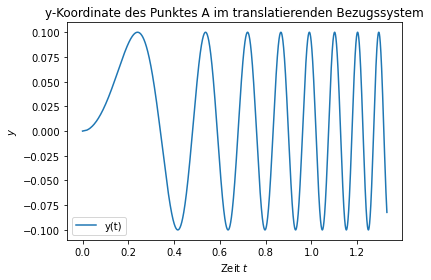

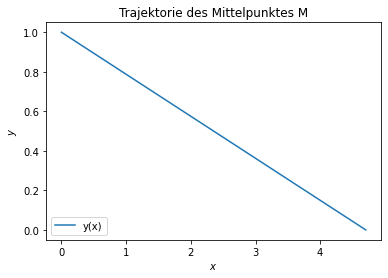

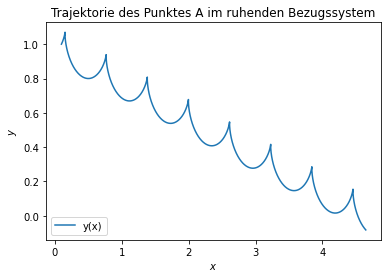

In [22]:
# Hilfe zur Berechnung von t:
t = np.zeros_like(v) # hier ist v die vorher berechnete Geschwindigkeit v
t[1:] = l[1:] / v[1:] # Berechnung der Zeit; l ist die zurückgelegte Distanz wie in der Aufgabenstellung beschrieben
# Diese Art auf arrays zuzugreifen nennt man *slicing*. 

# Berechne die Koordinaten x und y von M in Abhängigkeit von l und theta
x_M = l*np.cos(th)
y_M = h0-l*np.sin(th)
# Berechne die Koordinaten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem abhängig von R, omega und t
x_A_M = R*np.cos(w(l)*t)
y_A_M = R*np.sin(w(l)*t)
# Berechne aus den Koordinaten x und y und aus den Koordianten des Punkts A im mit dem Mittelpunkt M translatierenden Koordinatensystem
# die Koordinaten des Punkts A im ruhenden Bezugssystem (Tipp: Addition)
x_A = x_M + x_A_M
y_A = y_M + y_A_M
# Plotte y-Koordinate des Punkts A im mit dem Punkt M translatierenden Koordinatensystem 
plt.title("y-Koordinate des Punktes A im translatierenden Bezugssystem")  # Titel
plt.plot(t, y_A_M, label='y(t)')
plt.xlabel("Zeit $t$")
plt.ylabel("$y$")
plt.legend(loc=3)
plt.show()
# Plotte Trajektorie von Mittelpunkt M und Punkt A
plt.title("Trajektorie des Mittelpunktes M")  # Titel
plt.plot(x_M, y_M, label='y(x)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc=3)
plt.show()

plt.title("Trajektorie des Punktes A im ruhenden Bezugssystem")  # Titel
plt.plot(x_A, y_A, label='y(x)')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(loc=3)
plt.show()